<a href="https://colab.research.google.com/github/li0217codeninja/signal-processing-toolbox/blob/main/denoise_ECG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Open files from GCS with gstuil

In [ ]:
from google.colab import auth
auth.authenticate_user()

# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id = 'biosignals-processing'
bucket_name = 'gs://nstdb-1.0.0.physionet.org'
!gcloud config set project {project_id}

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
#!ls '/content/gdrive/My Drive/Colab Notebooks'

In [ ]:
# Download the file from a given Google Cloud Storage bucket.
!gsutil -m -u {project_id} cp -r gs://nstdb-1.0.0.physionet.org '/content/gdrive/My Drive/ecg'

In [17]:
import os

data_path = '/content/gdrive/My Drive/ecg/nstdb-1.0.0.physionet.org'
os.chdir(data_path)
!ls

118e00.atr  118e18.hea	119e06.atr  119e24.hea	em.xws
118e00.dat  118e18.xws	119e06.dat  119e24.xws	ma.dat
118e00.hea  118e24.atr	119e06.hea  119e_6.atr	ma.hea
118e00.xws  118e24.dat	119e06.xws  119e_6.dat	ma.hea-
118e06.atr  118e24.hea	119e12.atr  119e_6.hea	ma.xws
118e06.dat  118e24.xws	119e12.dat  119e_6.xws	mit-bih-noise-stress-test-database-1.0.0.zip
118e06.hea  118e_6.atr	119e12.hea  ANNOTATORS	nstdb.doc
118e06.xws  118e_6.dat	119e12.xws  bw.dat	nstdbgen
118e12.atr  118e_6.hea	119e18.atr  bw.hea	nstdbgen-
118e12.dat  118e_6.xws	119e18.dat  bw.hea-	nstdb.txt
118e12.hea  119e00.atr	119e18.hea  bw.xws	old
118e12.xws  119e00.dat	119e18.xws  em.dat	RECORDS
118e18.atr  119e00.hea	119e24.atr  em.hea	SHA256SUMS.txt
118e18.dat  119e00.xws	119e24.dat  em.hea-


In [ ]:
# Unzip noise dataset
!unzip mit-bih-noise-stress-test-database-1.0.0.zip -d noise-stress-test-db

In [23]:
os.chdir(data_path + '/noise-stress-test-db/mit-bih-noise-stress-test-database-1.0.0' )
os.getcwd()
!ls

118e00.atr  118e12.dat	118e24.hea  119e00.xws	119e18.atr  119e_6.dat	em.hea	   nstdbgen-
118e00.dat  118e12.hea	118e24.xws  119e06.atr	119e18.dat  119e_6.hea	em.hea-    nstdb.txt
118e00.hea  118e12.xws	118e_6.atr  119e06.dat	119e18.hea  119e_6.xws	em.xws	   old
118e00.xws  118e18.atr	118e_6.dat  119e06.hea	119e18.xws  ANNOTATORS	ma.dat	   RECORDS
118e06.atr  118e18.dat	118e_6.hea  119e06.xws	119e24.atr  bw.dat	ma.hea	   SHA256SUMS.txt
118e06.dat  118e18.hea	118e_6.xws  119e12.atr	119e24.dat  bw.hea	ma.hea-
118e06.hea  118e18.xws	119e00.atr  119e12.dat	119e24.hea  bw.hea-	ma.xws
118e06.xws  118e24.atr	119e00.dat  119e12.hea	119e24.xws  bw.xws	nstdb.doc
118e12.atr  118e24.dat	119e00.hea  119e12.xws	119e_6.atr  em.dat	nstdbgen


In [ ]:
#install requiured waveform database to extract PhysioNet signals and annotations
!pip install wfdb

## Extract Biosignals

In [28]:
# Import libraries
import wfdb
import pandas as pd
import matplotlib.pyplot as plt


In [49]:
# Open the selected record
record = wfdb.rdrecord('118e00')
annotations = wfdb.rdann('118e00','atr')

print(list(set(annotations.symbol)))

signals = record.p_signal

sampling_freq = record.fs

['A', '+', '~', 'R', 'x', 'V']


In [33]:
type(signals)

numpy.ndarray

In [38]:
dir(record)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adjust_datetime',
 '_arrange_fields',
 '_auto_signal_file_names',
 'adc',
 'adc_gain',
 'adc_res',
 'adc_zero',
 'base_counter',
 'base_date',
 'base_datetime',
 'base_time',
 'baseline',
 'block_size',
 'byte_offset',
 'calc_adc_params',
 'calc_checksum',
 'check_field',
 'check_field_cohesion',
 'check_read_inputs',
 'check_sig_cohesion',
 'checksum',
 'comments',
 'convert_dtype',
 'counter_freq',
 'd_signal',
 'dac',
 'e_d_signal',
 'e_p_signal',
 'file_name',
 'fmt',
 'fs',
 'get_absolute_time',
 'get_elapsed_time',
 'get_frame_number',
 'get_write_fields',
 'get_write_subset',
 'init_value',
 'n_sig',
 'p_signal',

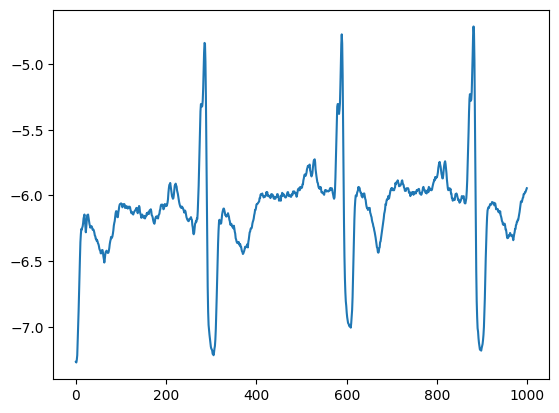

In [44]:
plt.plot(signals[1000:2000,0])

In [45]:
df =record.to_dataframe()
df.head()

,MLII,V1
0 days 00:00:00,-5.955,-5.635
0 days 00:00:00.002777777,-5.955,-5.635
0 days 00:00:00.005555554,-5.955,-5.635
0 days 00:00:00.008333331,-5.955,-5.635
0 days 00:00:00.011111108,-5.955,-5.635


## FIR Filter

In [52]:
from scipy import signal
import numpy as np

def apply_fir_filter(x, fc, fs, filter_order):
  ''' retrospective filtering
  x: signal, fc: cut-off freq, fs: sampling filtering
  '''
  normalized_cutoff = fc /(fs/2)

  fir_coef = signal.firwin(filter_order, normalized_cutoff, window='hamming')

  filt_x = np.convolve(x, fir_coef, mode='same')

  return filt_x, fir_coef

In [60]:
fc = 10.0 #HZ
filter_order = 5
fs = sampling_freq
x = signals[1000:2000,0]
filt_signal, fir_coefficients = apply_fir_filter(x, fc, fs, filter_order)


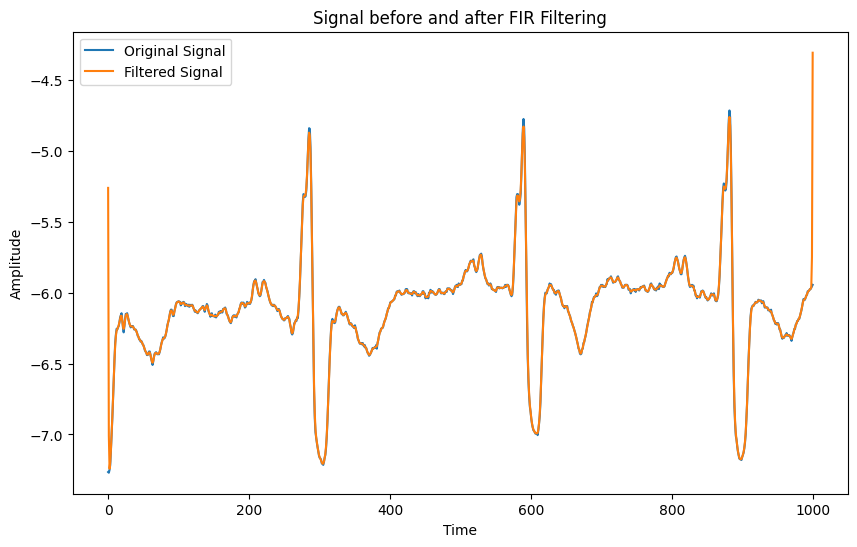

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(x, label='Original Signal')
plt.plot(filt_signal, label='Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal before and after FIR Filtering')
plt.legend()
plt.show()